In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.utils import resample


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, roc_auc_score

from scipy.cluster.hierarchy import dendrogram, linkage
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("bank.csv", delimiter=";")
print(df.info())
print(df.shape)
print(df["y"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
(4521, 17)
y
no     4000
yes     521
Name: count, dtype: int64


C:\Users\enesy\AppData\Local\Temp\ipykernel_18120\3502158121.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= counts.index, y= counts.values, palette="viridis")


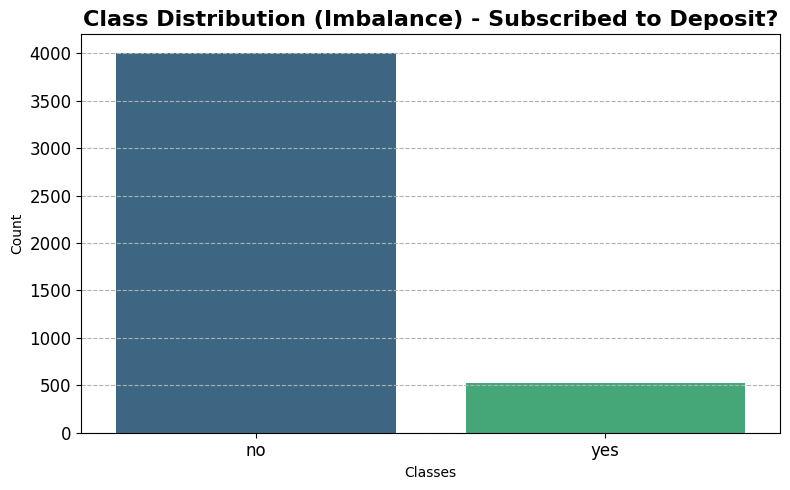

In [4]:
counts = df["y"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x= counts.index, y= counts.values, palette="viridis")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Distribution (Imbalance) - Subscribed to Deposit?", fontsize=16, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()

Since the dataset is highly imbalanced (4000 "no" vs 521 "yes"), we apply downsampling to the majority class

In [5]:
no_df = df[df["y"] == "no"]
yes_df = df[df["y"] == "yes"]

downsampled_no = resample(no_df,
                        replace=False,
                        n_samples = len(yes_df),
                        random_state=57
)

balanced_df = pd.concat([yes_df, downsampled_no])
print(balanced_df.info())
print(balanced_df.shape)
print(balanced_df["y"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 13 to 979
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1042 non-null   int64 
 1   job        1042 non-null   object
 2   marital    1042 non-null   object
 3   education  1042 non-null   object
 4   default    1042 non-null   object
 5   balance    1042 non-null   int64 
 6   housing    1042 non-null   object
 7   loan       1042 non-null   object
 8   contact    1042 non-null   object
 9   day        1042 non-null   int64 
 10  month      1042 non-null   object
 11  duration   1042 non-null   int64 
 12  campaign   1042 non-null   int64 
 13  pdays      1042 non-null   int64 
 14  previous   1042 non-null   int64 
 15  poutcome   1042 non-null   object
 16  y          1042 non-null   object
dtypes: int64(7), object(10)
memory usage: 146.5+ KB
None
(1042, 17)
y
yes    521
no     521
Name: count, dtype: int64


In [6]:
balanced_df['y_binary'] = balanced_df['y'].map({'yes': 1, 'no': 0})

#--------------------Job---------------------------
most_freq_job = balanced_df["job"].mode()[0]

balanced_df["job"] = balanced_df["job"].replace("unknown", most_freq_job)

balanced_df["job"].unique()

#--------------------Education---------------------
education_order = ["primary", "secondary", "tertiary"]

balanced_df["education"] = balanced_df["education"].replace("unknown", np.nan)

most_frequent = balanced_df["education"].mode()[0]

balanced_df["education"] = balanced_df["education"].replace(np.nan, most_frequent)

encoder = OrdinalEncoder(categories=[education_order])
balanced_df["education"] = encoder.fit_transform(balanced_df[["education"]])

In [7]:
most_freq_job = balanced_df["contact"].mode()[0]

balanced_df["contact"] = balanced_df["contact"].replace("unknown", most_freq_job)

balanced_df["contact"].unique()

array(['cellular', 'telephone'], dtype=object)

In [8]:
#---------------------Default-------------------
balanced_df.drop("default", axis=1, inplace=True)

#---------------------Duration------------------
balanced_df.drop("duration", axis=1, inplace=True)

In [9]:
cols = ["housing", "loan", "month", "poutcome", "contact", "marital", "job"]
balanced_df = pd.get_dummies(balanced_df, columns=cols, drop_first=True, dtype=int)
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 13 to 979
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1042 non-null   int64  
 1   education          1042 non-null   float64
 2   balance            1042 non-null   int64  
 3   day                1042 non-null   int64  
 4   campaign           1042 non-null   int64  
 5   pdays              1042 non-null   int64  
 6   previous           1042 non-null   int64  
 7   y                  1042 non-null   object 
 8   y_binary           1042 non-null   int64  
 9   housing_yes        1042 non-null   int64  
 10  loan_yes           1042 non-null   int64  
 11  month_aug          1042 non-null   int64  
 12  month_dec          1042 non-null   int64  
 13  month_feb          1042 non-null   int64  
 14  month_jan          1042 non-null   int64  
 15  month_jul          1042 non-null   int64  
 16  month_jun          1042 non-n

In [10]:
balanced_df.drop("y", axis=1, inplace=True)
balanced_df.dtypes.value_counts()

int64      36
float64     1
Name: count, dtype: int64

In [11]:
y, X = balanced_df["y_binary"], balanced_df.drop("y_binary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=57)

In [12]:
scaler = StandardScaler()

num_cols = ["age", "balance", "day", "campaign", "pdays", "previous"]

X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

In [13]:
logistic_model = LogisticRegression(random_state=57)
logistic_model.fit(X_train_scaled, y_train)

y_pred  =logistic_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[69 35]
 [37 68]]
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       104
           1       0.66      0.65      0.65       105

    accuracy                           0.66       209
   macro avg       0.66      0.66      0.66       209
weighted avg       0.66      0.66      0.66       209



In [14]:
y_probs = logistic_model.predict_proba(X_test_scaled)[:,1]
treshold = 0.4

y_pred_custom = (y_probs >= treshold).astype(int)

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[[46 58]
 [17 88]]
              precision    recall  f1-score   support

           0       0.73      0.44      0.55       104
           1       0.60      0.84      0.70       105

    accuracy                           0.64       209
   macro avg       0.67      0.64      0.63       209
weighted avg       0.67      0.64      0.63       209



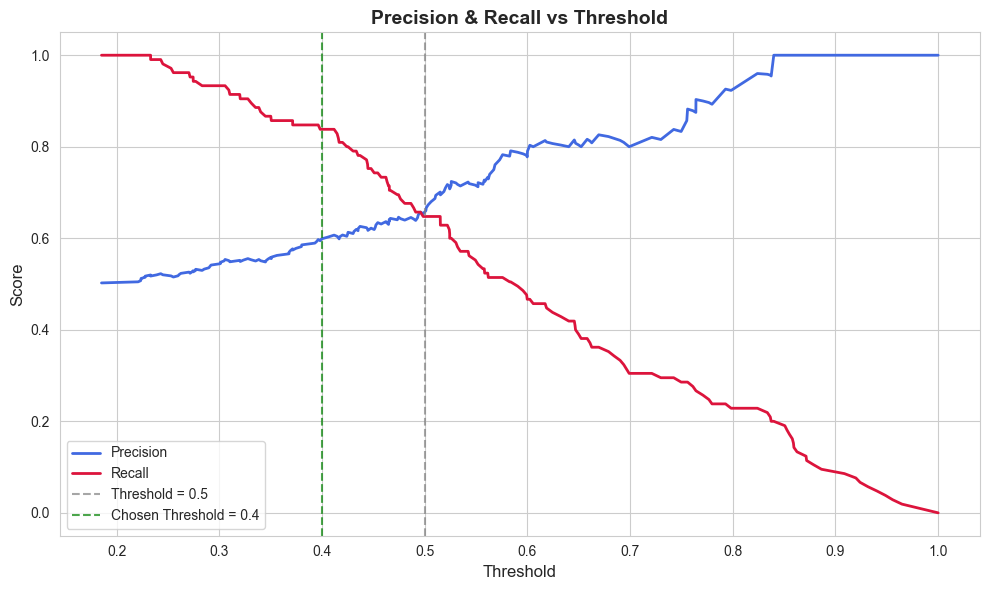

In [15]:
y_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
thresholds = np.append(thresholds, 1.0)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

plt.plot(thresholds, precisions, label='Precision', color='royalblue', linewidth=2)
plt.plot(thresholds, recalls, label='Recall', color='crimson', linewidth=2)

plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.7, label='Threshold = 0.5')
plt.axvline(x=0.4, color='green', linestyle='--', alpha=0.7, label='Chosen Threshold = 0.4')

plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision & Recall vs Threshold', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67 37]
 [42 63]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.63       104
           1       0.63      0.60      0.61       105

    accuracy                           0.62       209
   macro avg       0.62      0.62      0.62       209
weighted avg       0.62      0.62      0.62       209



In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[65 39]
 [44 61]]
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       104
           1       0.61      0.58      0.60       105

    accuracy                           0.60       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.60      0.60      0.60       209



In [18]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[69 35]
 [47 58]]
              precision    recall  f1-score   support

           0       0.59      0.66      0.63       104
           1       0.62      0.55      0.59       105

    accuracy                           0.61       209
   macro avg       0.61      0.61      0.61       209
weighted avg       0.61      0.61      0.61       209



In [19]:
dt_model = DecisionTreeClassifier(random_state=57, max_depth=5)

dt_model.fit(X_train_scaled, y_train)

y_pred = dt_model.predict(X_test_scaled)

print(dt_model.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5789473684210527
[[33 71]
 [17 88]]
              precision    recall  f1-score   support

           0       0.66      0.32      0.43       104
           1       0.55      0.84      0.67       105

    accuracy                           0.58       209
   macro avg       0.61      0.58      0.55       209
weighted avg       0.61      0.58      0.55       209



In [20]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=57)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

print(rf_model.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
total = tn + fp + fn + tp
print(rf_model.score(X_test_scaled, y_test))

0.6746411483253588
[[83 21]
 [47 58]]
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       104
           1       0.73      0.55      0.63       105

    accuracy                           0.67       209
   macro avg       0.69      0.68      0.67       209
weighted avg       0.69      0.67      0.67       209

0.6746411483253588


c:\Users\enesy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\enesy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

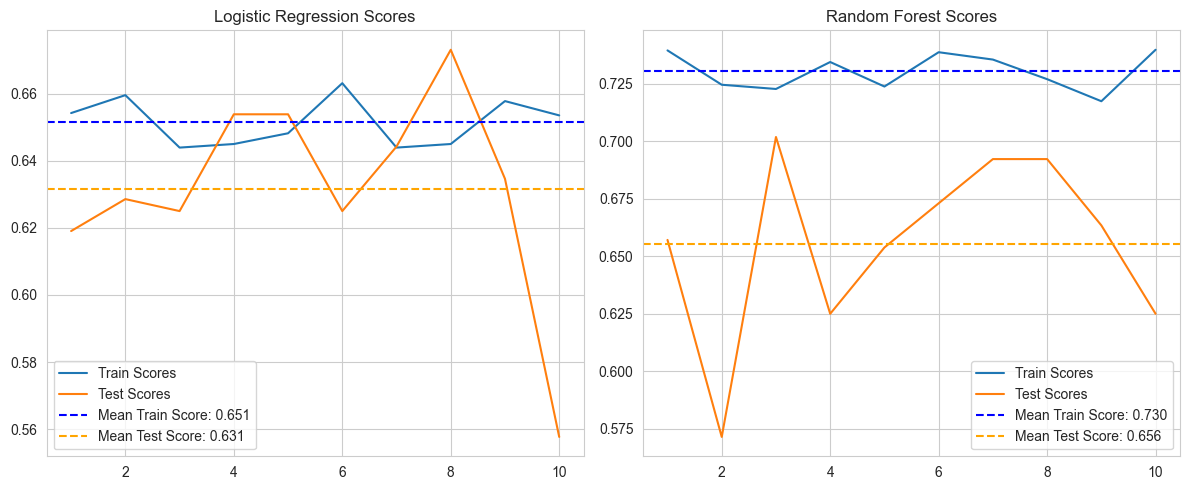

logistic regression scores  0.6514193781815121 0.631492673992674
random forest scores  0.7304332886565799 0.6555494505494506


In [21]:
logistic_scores = cross_validate(logistic_model, X, y, cv=10, return_train_score=True)
logistic_train_scores = logistic_scores["train_score"]
logistic_test_scores = logistic_scores["test_score"]

rf_scores = cross_validate(rf_model, X, y, cv=10, return_train_score=True)
rf_train_scores = rf_scores['train_score']
rf_test_scores = rf_scores['test_score']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)   
plt.plot(range(1,11), logistic_train_scores, label = "Train Scores")  
plt.plot(range(1,11), logistic_test_scores, label="Test Scores")
plt.axhline(np.mean(logistic_train_scores), color='blue', linestyle='--', label=f'Mean Train Score: {np.mean(logistic_train_scores):.3f}')  
plt.axhline(np.mean(logistic_test_scores), color='orange', linestyle='--', label=f'Mean Test Score: {np.mean(logistic_test_scores):.3f}')  
plt.title("Logistic Regression Scores")  
plt.legend()

plt.subplot(1,2,2)  
plt.plot(range(1,11), rf_train_scores, label = "Train Scores")  
plt.plot(range(1,11), rf_test_scores, label="Test Scores")
plt.axhline(np.mean(rf_train_scores), color='blue', linestyle='--', label=f'Mean Train Score: {np.mean(rf_train_scores):.3f}')  
plt.axhline(np.mean(rf_test_scores), color='orange', linestyle='--', label=f'Mean Test Score: {np.mean(rf_test_scores):.3f}')  

plt.title("Random Forest Scores")  
plt.legend()


plt.legend()
plt.tight_layout()  
plt.show()

print("logistic regression scores ", logistic_train_scores.mean(), logistic_test_scores.mean())
print("random forest scores ", rf_train_scores.mean(), rf_test_scores.mean())

In [22]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [23]:
print(f"duration mean : {df['duration'].mean()}")
print("\n")

print(f"Mean duration by y : \n {df['duration'].groupby(df['y']).mean()}")
print("\n")

print(f"Mean Balance by y: \n {df['balance'].groupby(df['y']).mean()}")

duration mean : 263.96129174961294


Mean duration by y : 
 y
no     226.347500
yes    552.742802
Name: duration, dtype: float64


Mean Balance by y: 
 y
no     1403.211750
yes    1571.955854
Name: balance, dtype: float64


In [27]:
import pickle


with open("X_train.pkl", "wb") as f:
    pickle.dump(X_train_scaled, f)

with open("X_test.pkl", "wb") as f:
    pickle.dump(X_test_scaled, f)

with open("y_train.pkl", "wb") as f:
    pickle.dump(y_train, f)

with open("y_test.pkl", "wb") as f:
    pickle.dump(y_test, f)

with open("X.pkl", "wb") as f:
    pickle.dump(X, f)

with open("y.pkl", "wb") as f:
    pickle.dump(y, f)


with open("rf_scoresFullX.pk", "wb") as f:
    pickle.dump(rf_scores, f)

,age,education,balance,day,campaign,pdays,previous,housing_yes,loan_yes,month_aug,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
13,20,1.0,502,30,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30,68,1.0,4189,14,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33,32,2.0,2536,26,6,-1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
34,49,2.0,1235,13,3,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,78,0.0,229,22,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,36,1.0,-11,30,28,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3002,27,1.0,3354,14,5,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2658,56,1.0,2146,9,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4070,31,1.0,481,20,2,183,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
